# Introduction:

![VW cars](https://wallpapercave.com/wp/wp2170192.jpg)

In this analysis, I have done a basic EDA of features and I have selected k-best features out of both linear features and from polynomial features and have applied regression on top of it to find the maximum r_squared value that I am able to acheive from the data.

1. Introduction
2. Importing dataset and exploration
3. Exploratory data analysis
4. Pre-processing for modeling
5. Modeling
6. Conclusion

Importing the packages needed for the analysis. I usually like to import the packages in the alphabetical order, so that it is easy for reviewing if needed

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

# Importing dataset and exploration

There are many files in the input folder for each of the car brands. We will import the file that is with VW naming on it.

In [3]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
data_vw = pd.read_csv('vw.csv')
print(data_vw.shape)
data_vw.head()

(15157, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


Seeing if there are any missing values in the records

In [5]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

There is no null value

In [6]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


# Exploratory data analysis

<AxesSubplot:xlabel='transmission', ylabel='count'>

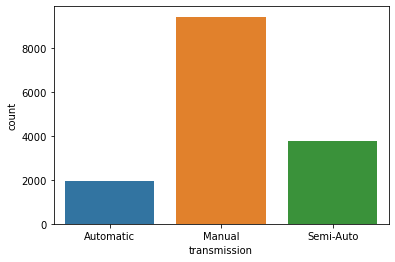

In [7]:
sns.countplot(data_vw["transmission"])

Most of the cars on the dataset are with manual transmission with very few cars in automatic and semi automatic transmission

In [8]:
data_vw["model"].value_counts()

 Golf               4863
 Polo               3287
 Tiguan             1765
 Passat              915
 Up                  884
 T-Roc               733
 Touareg             363
 Touran              352
 T-Cross             300
 Golf SV             268
 Sharan              260
 Arteon              248
 Scirocco            242
 Amarok              111
 Caravelle           101
 CC                   95
 Tiguan Allspace      91
 Beetle               83
 Shuttle              61
 Caddy Maxi Life      59
 Jetta                32
 California           15
 Caddy Life            8
 Eos                   7
 Caddy                 6
 Fox                   4
 Caddy Maxi            4
Name: model, dtype: int64

In [9]:
print(data_vw["model"].value_counts() / len(data_vw))

 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Fox                0.000264
 Caddy Maxi         0.000264
Name: model, dtype: float64


<AxesSubplot:xlabel='count', ylabel='model'>

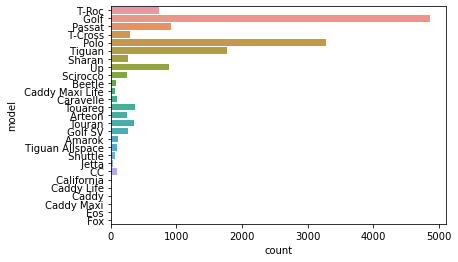

In [10]:
sns.countplot(y = data_vw["model"])

Top 3 cars are Golf, Polo and Tiguan on the dataset constuite 64% of all the VW cars, with all other cars contributing to 36%

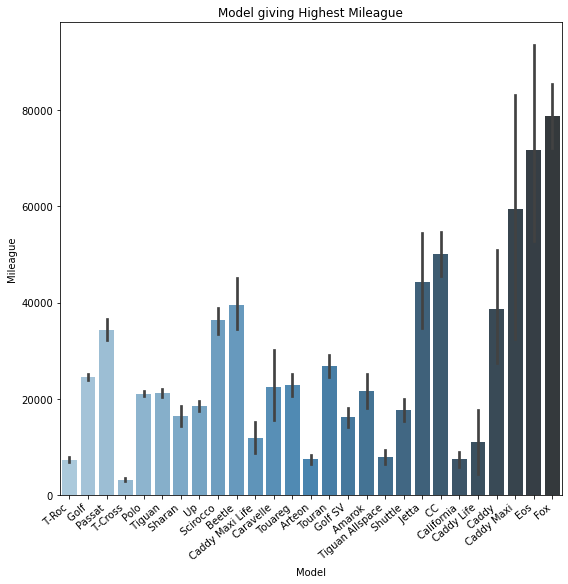

In [11]:
#Barplot between Model and Mileague to see which model gives Good Mileague
plt.figure(figsize=(8,8))
#To avoid overlapping of x-axis labels assign to a variable ax
ax = sns.barplot(x = data_vw.model , y=data_vw.mileage, palette="Blues_d")
#code to rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Model giving Highest Mileague")
plt.xlabel("Model")
plt.ylabel("Mileague")
plt.show()

### Model Fox Seems to give Good Mileague

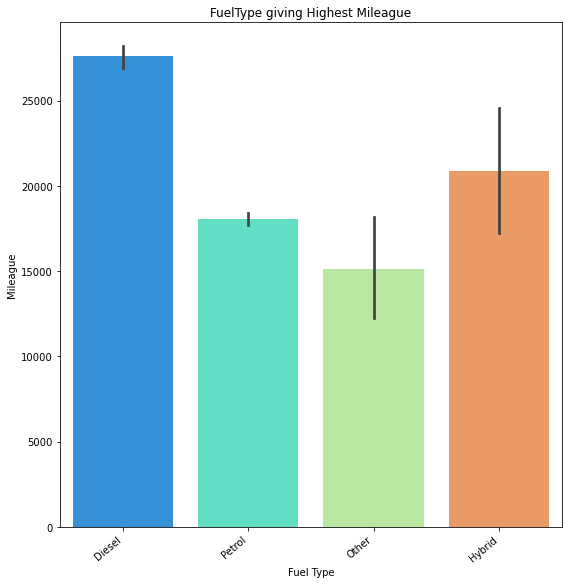

In [12]:
#Barplot between FuelType and Mileague to see which Fuel type gives Good Mileague
plt.figure(figsize=(8,8))
#To avoid overlapping of x-axis labels assign to a variable ax
ax = sns.barplot(x = data_vw.fuelType , y=data_vw.mileage, palette="rainbow")
#code to rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("FuelType giving Highest Mileague")
plt.xlabel("Fuel Type")
plt.ylabel("Mileague")
plt.show()

<AxesSubplot:>

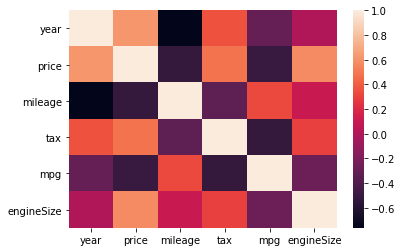

In [13]:
sns.heatmap(data_vw.corr())

In [14]:
(data_vw["fuelType"])

0        Diesel
1        Diesel
2        Diesel
3        Petrol
4        Petrol
          ...  
15152    Diesel
15153    Petrol
15154    Petrol
15155    Petrol
15156    Petrol
Name: fuelType, Length: 15157, dtype: object

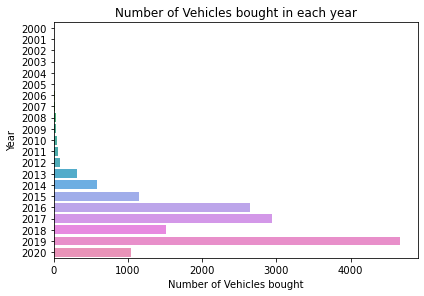

In [15]:
sns.countplot(y = data_vw["year"])
plt.tight_layout()
plt.title("Number of Vehicles bought in each year")
plt.xlabel("Number of Vehicles bought")
plt.ylabel("Year")
plt.show()

### In the year 2019, more number of Vehicles were Sold

<AxesSubplot:xlabel='year', ylabel='price'>

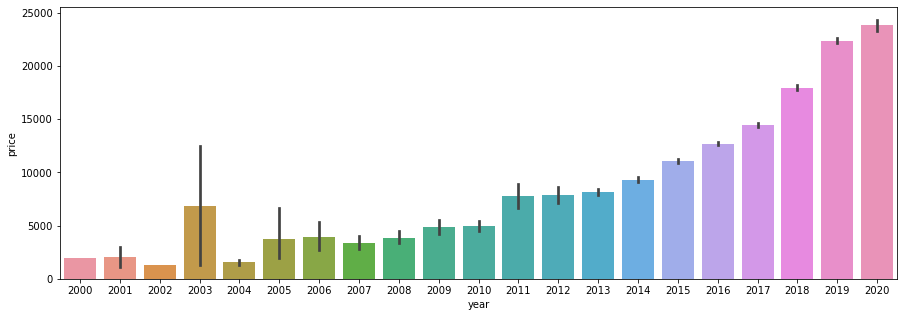

In [16]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = data_vw["year"], y = data_vw["price"])

### The recently manufactured cars (year = 2018, 2019) are sold for more average price when compared to the cars that are manufactured earlier.

### Lets compare the transmission and their price range

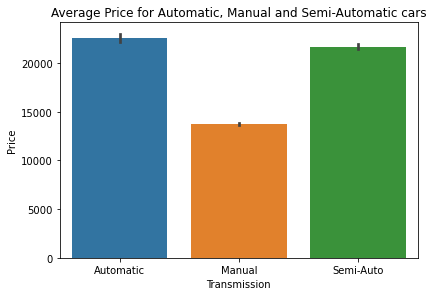

In [17]:
sns.barplot(x = data_vw["transmission"], y = data_vw["price"])
plt.tight_layout()
plt.title("Average Price for Automatic, Manual and Semi-Automatic cars")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

### Price for Automatic and Semi Automatic cars seems more over same and higher than Manual car

<AxesSubplot:xlabel='mileage', ylabel='price'>

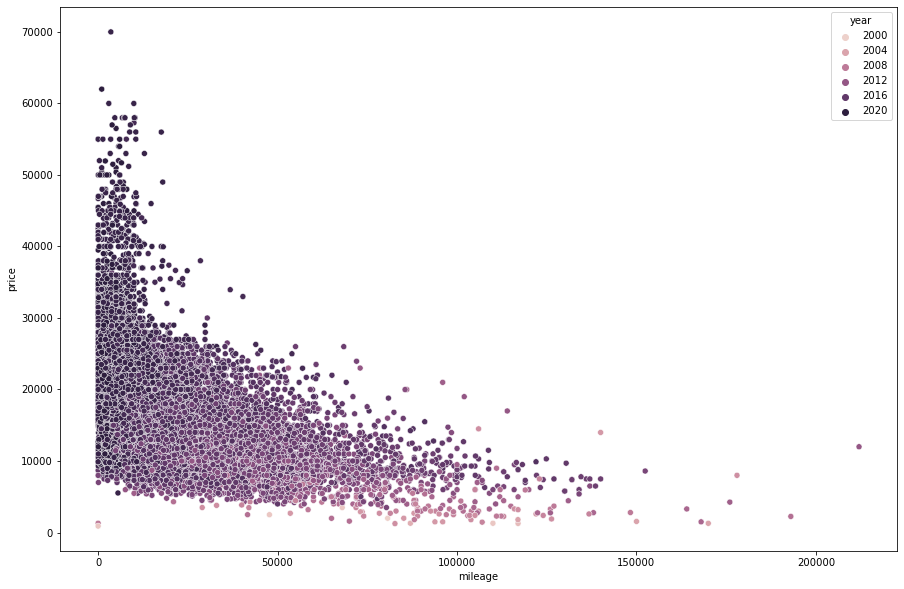

In [18]:
plt.figure(figsize=(15,10),facecolor='w') 
sns.scatterplot(data_vw["mileage"], data_vw["price"], hue = data_vw["year"])

<AxesSubplot:xlabel='mileage', ylabel='price'>

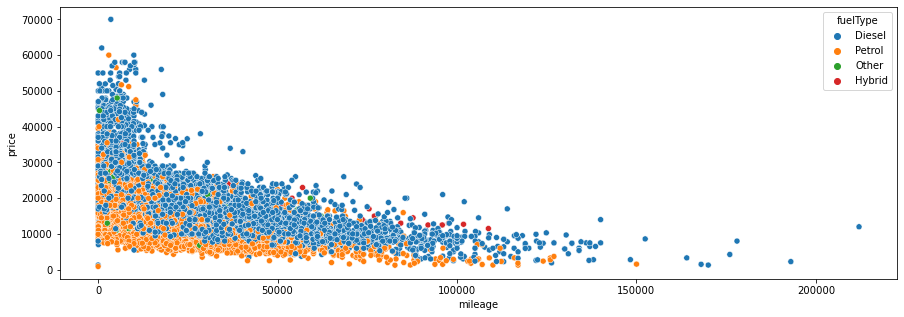

In [19]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(data_vw["mileage"], data_vw["price"], hue = data_vw["fuelType"])

### Diesel provides good Mileague

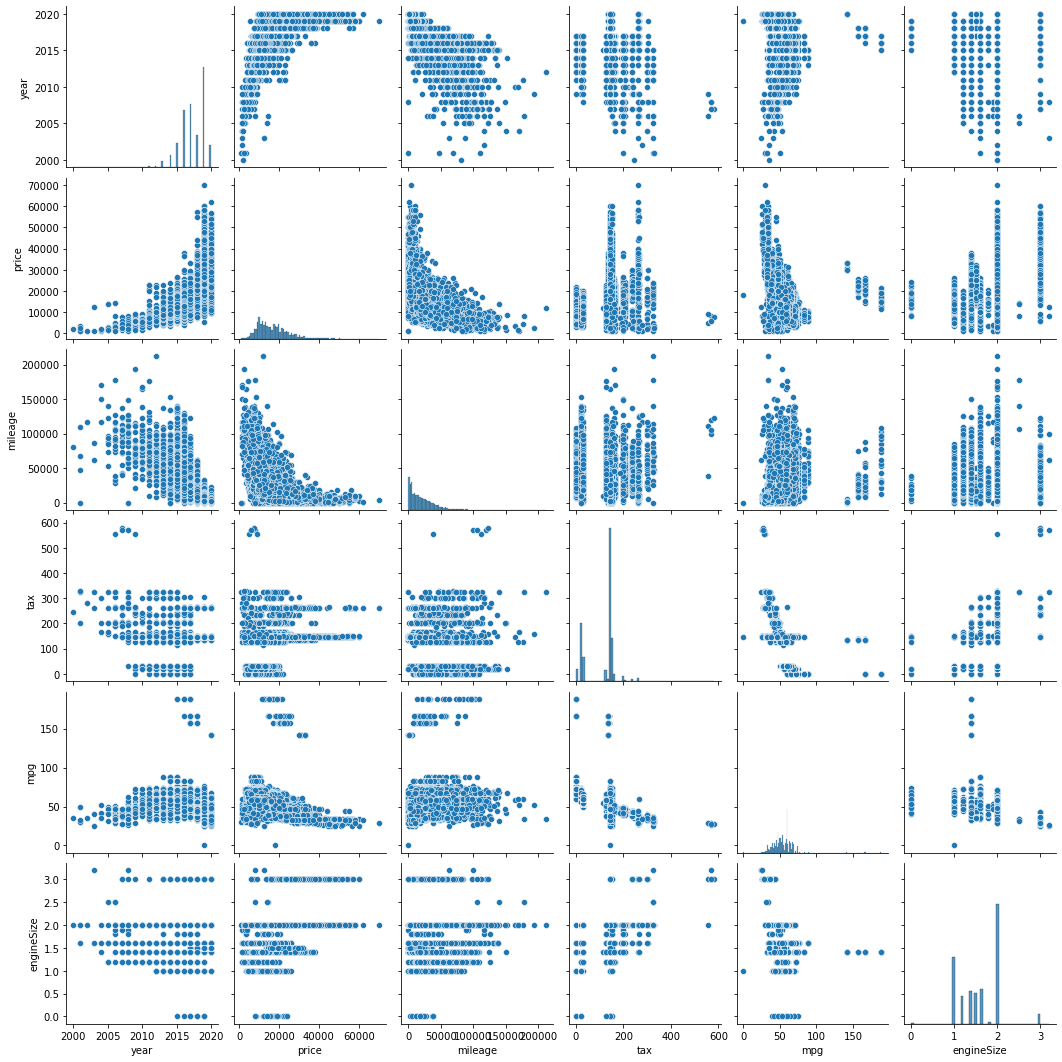

In [20]:
sns.pairplot(data_vw)

Now I am computing a age field, subtracting 2020 from the year field and dropping the year field

In [21]:
data_vw["year"]

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
15152    2012
15153    2008
15154    2009
15155    2006
15156    2007
Name: year, Length: 15157, dtype: int64

In [22]:
data_vw["age_of_car"] = 2020 - data_vw["year"]

In [23]:
data_vw = data_vw.drop(columns = ["year"])
data_vw.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
13079,Scirocco,16521,Semi-Auto,15711,Petrol,145,44.1,2.0,3
9404,Polo,9690,Manual,18085,Petrol,145,60.1,1.0,3
174,T-Roc,23799,Semi-Auto,6532,Petrol,145,41.5,2.0,2
14537,Golf SV,9495,Manual,49148,Diesel,0,72.4,1.6,4
6690,T-Cross,19680,Automatic,6180,Petrol,145,45.6,1.0,1
460,T-Roc,33450,Automatic,2425,Petrol,145,32.5,2.0,1
1346,Golf,24989,Automatic,5613,Petrol,145,37.7,2.0,1
14303,Touran,25490,Semi-Auto,5985,Petrol,145,38.7,1.5,1
12023,Sharan,10891,Semi-Auto,64024,Diesel,165,49.6,2.0,6
4648,Golf,18990,Automatic,100,Diesel,150,70.6,1.6,1


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data_vw, train_size = 0.7, test_size = 0.3, random_state = 100)

# Pre-processing for modeling

#### Using pd.get_dummies option over OHE in SKLearn to get the one hot encoded variables for the categorical variables.

In [25]:
data_vw_expanded = pd.get_dummies(data_vw)
data_vw_expanded.head(10)

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5,31895,10,145,42.2,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6,27895,10,145,42.2,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
7,39495,10,145,32.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
8,21995,10,145,44.1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
9,23285,10,145,42.2,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


#### Values are not in Standardized format. there seems to be very high value and very low value too. So applying the standard scalar option to standardize all the variables in the dataset.

In [26]:
std = StandardScaler()
data_vw_expanded_std = std.fit_transform(data_vw_expanded)
data_vw_expanded_std = pd.DataFrame(data_vw_expanded_std, columns = data_vw_expanded.columns)
print(data_vw_expanded_std.shape)
data_vw_expanded_std.head()

(15157, 40)


,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1.052392,-0.387209,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1,1.295211,-0.828948,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2,0.407627,-0.694090,0.508120,-0.245816,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
3,2.147462,-0.816512,0.508120,-1.557966,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,-0.851661,-0.09828,-0.075981,0.878707
4,0.781591,-0.737309,0.586884,-1.022843,-0.218101,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707


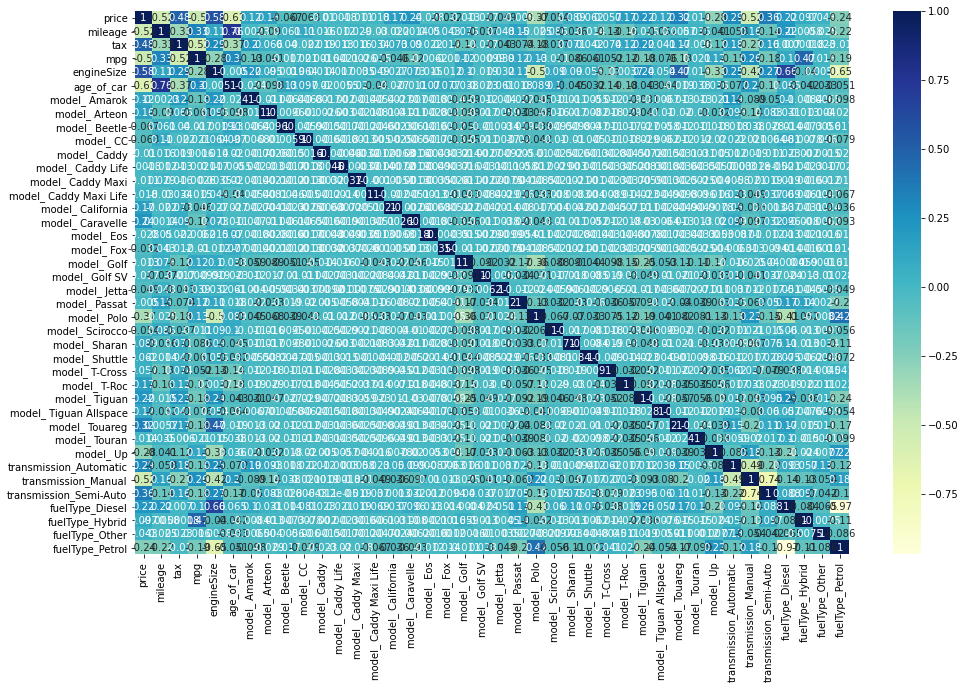

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data_vw_expanded_std.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [28]:
y = data_vw_expanded_std[['price']]
X = data_vw_expanded_std.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10609, 39)
(4548, 39)
(10609, 1)
(4548, 1)


# Modeling

## Model 1 : Linear Regression

In [29]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

[0.00099584]
[[-2.15165433e-01 -7.24727274e-02 -1.36809930e-01  4.31794354e-01
  -3.40897369e-01 -1.65284197e+10 -2.45928811e+10 -1.43058153e+10
  -1.52989786e+10 -3.85616481e+09 -4.45242168e+09 -3.14875319e+09
  -1.20710495e+10 -6.09532074e+09 -1.57715655e+10 -4.16499658e+09
  -3.14875319e+09 -9.04906129e+10 -2.55481510e+10 -8.89778676e+09
  -4.61695191e+10 -7.98885474e+10 -2.42984530e+10 -2.51707059e+10
  -1.22731255e+10 -2.70013515e+10 -4.15866710e+10 -6.21805255e+10
  -1.49754193e+10 -2.96384462e+10 -2.91967728e+10 -4.54300357e+10
   1.42641047e+11  2.06201160e+11  1.83924105e+11  2.73625541e+11
   5.39574162e+10  4.18758966e+10  2.74859425e+11]]


In [31]:
y_pred = lm.predict(X_train)

print('Train metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train, y_pred)*100, 2))

y_pred = lm.predict(X_test)

print('Validation metrics...')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test, y_pred)*100, 2))

Train metrics...
RMSE:  0.3311139680321929
r2_score:  89.18
Validation metrics...
RMSE:  0.3386639217178997
r2_score:  88.17


## Model 2: Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [34]:
np.random.seed(0)
df_train, df_test = train_test_split(data_vw_expanded_std, train_size=0.7, random_state=100)

In [35]:
df_train.shape, df_test.shape

((10609, 40), (4548, 40))

In [36]:
df_test.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1678,0.020123,1.045440,-1.460988,0.465237,-0.434702,0.124594,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707
1574,-0.031458,-0.188327,-1.460988,0.465237,-0.434702,0.124594,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707
11564,-0.669131,1.083173,1.374527,-0.443738,0.864902,1.585876,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,2.754548,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2020,-0.688345,0.897106,-1.776045,1.506161,-0.001500,0.611688,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1559,-0.108830,0.163901,0.508120,0.377272,-0.218101,-0.362501,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,-0.851661,-0.09828,-0.075981,0.878707


In [37]:
df_train.price.describe()

count    10609.000000
mean         0.003679
std          1.006530
min         -2.010243
25%         -0.754240
50%         -0.173307
75%          0.536322
max          5.823011
Name: price, dtype: float64

In [38]:
y_train = df_train.pop("price")
X_train = df_train

y_test = df_test.pop("price")
X_test = df_test

In [39]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

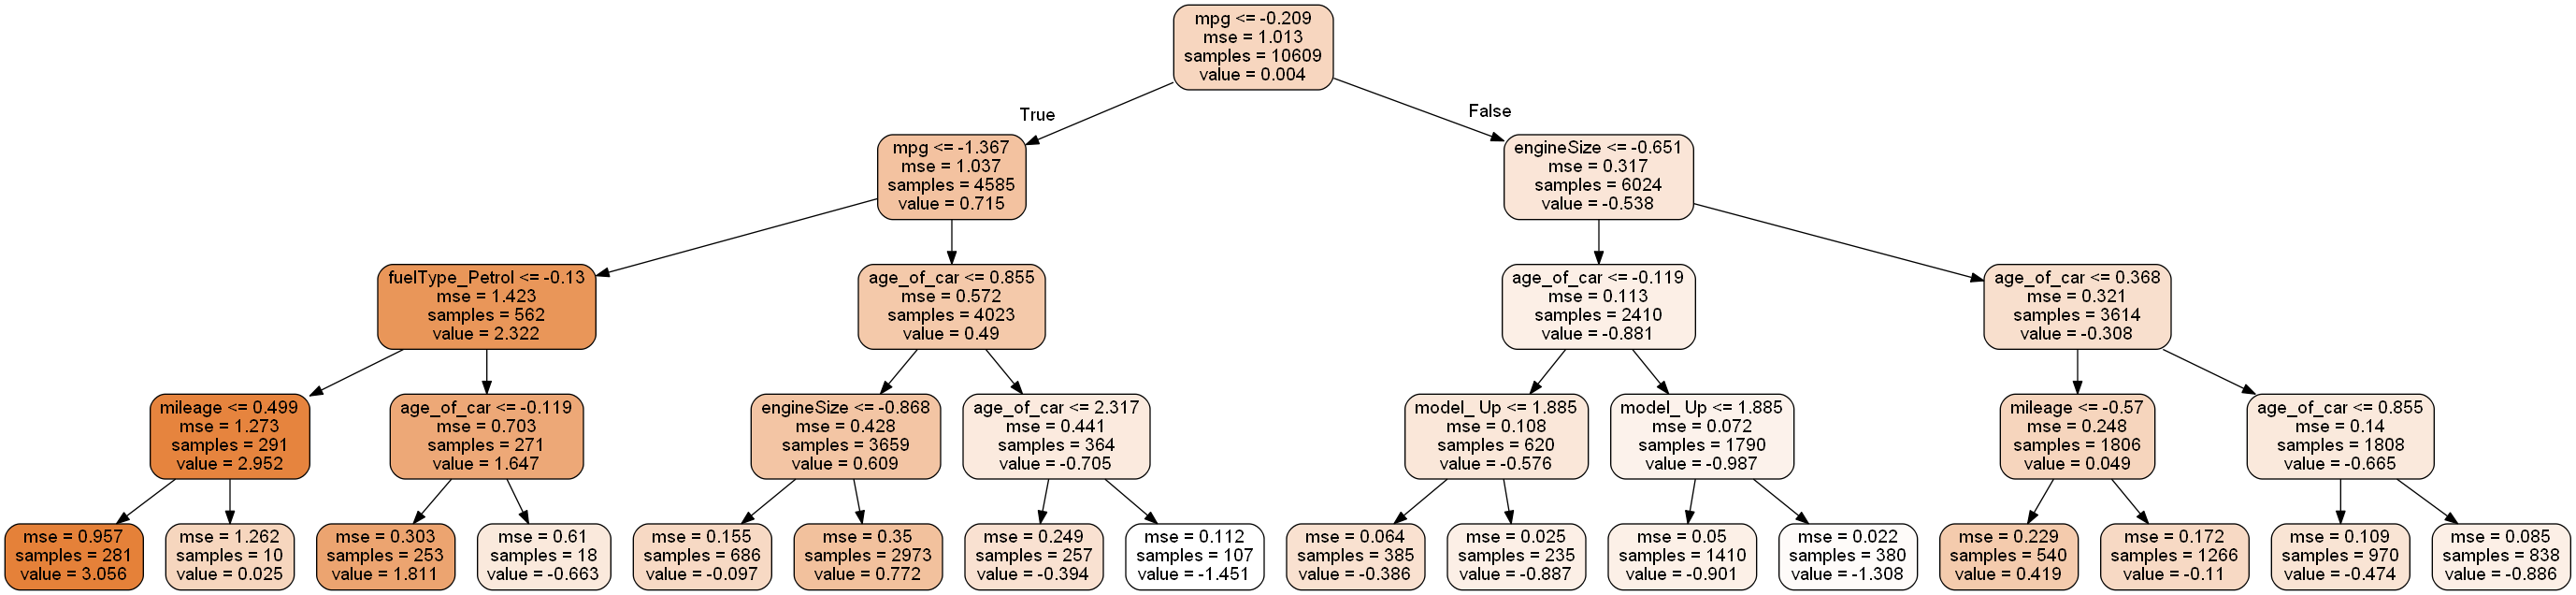

In [40]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [41]:
y_train_pred = dt.predict(X_train)

In [42]:
r2_score(y_train, y_train_pred)

0.793376554194602

In [43]:
y_test_pred = dt.predict(X_test)

In [44]:
r2_score(y_test, y_test_pred)

0.7841700224558177

### Hyper parameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1,5,10,15,20,25,30,35],
    'min_samples_leaf': [5,10,15,20,25,30,35],
    'splitter': ["best","random"],
    'max_features':["auto","log2","sqrt",None],
    'max_leaf_nodes':[None,5,10,15,20,25]
}

In [47]:
DT_HPTm=DecisionTreeRegressor()
grid_search=GridSearchCV(DT_HPTm,param_grid=params,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [48]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2688 candidates, totalling 8064 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, s

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, ma

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=a

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=l

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, ma

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, m

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=N

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_features

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=au

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, m

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=l

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqr

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqr

[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=Non

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, m

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_f

[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=au

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=15, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_f

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=25, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_f

[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_feature

[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_featu

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_d

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max

[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_featu

[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_f

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=10, max_f

[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_dep

[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_f

[CV 2/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_fea

[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END m

[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features

[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=log2, max_leaf_nodes=20, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_f

[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END m

[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sq

[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_featu

[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1

[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_feature

[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_f

[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=15, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=15, max_fe

[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=5, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=aut

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_fea

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_fea

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_d

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max

[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=15, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=15, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_featur

[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=2

[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_featu

[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_fea

[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max

[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=No

[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_f

[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=20, max_features

[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max

[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max

[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max

[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END m

[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=

[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max

[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=log2, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max

[CV 2/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sq

[CV 3/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_feature

[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=2

[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=5, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=

[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=15, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_fea

[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=25, max_features=None, max_leaf_nodes=25, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=25, max_f

[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=5, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, ma

[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=10, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max

[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max

[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max

[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_fea

[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=log2, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_f

[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max

[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_fea

[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/3] END max_d

[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max

[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=15, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=15, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=15, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=15, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_fe

[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=30, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=30, max_f

[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=auto, max_leaf_nodes=5, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=au

[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=15, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_featu

[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=auto, max_leaf_nodes=20, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=auto, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_fe

[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END m

[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=10, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_featu

[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=log2, max_leaf_nodes=25, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features

[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_fea

[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_fea

[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=25, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max

[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=None, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/3] END max_d

[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=10, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_fea

[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_fe

[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=25, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=35, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=35, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=35, max_features=None, max_leaf_nodes=25, min_samples_leaf=35, splitter=random; total time=   0.0s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 5, 10, 15, 20, 25, 30, 35],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [49]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007646,4.708648e-04,0.001995,2.247832e-07,1,auto,None,5,best,"{'max_depth': 1, 'max_features': 'auto', 'max_...",-0.622519,-0.626788,-0.657434,-0.635580,0.015551,2290
1,0.005982,7.370010e-07,0.001996,1.123916e-07,1,auto,None,5,random,"{'max_depth': 1, 'max_features': 'auto', 'max_...",-0.724873,-0.647453,-0.759680,-0.710669,0.046904,2438
2,0.006647,4.723262e-04,0.002001,7.840875e-06,1,auto,None,10,best,"{'max_depth': 1, 'max_features': 'auto', 'max_...",-0.622519,-0.626788,-0.657434,-0.635580,0.015551,2290
3,0.005651,4.689539e-04,0.002002,9.336624e-06,1,auto,None,10,random,"{'max_depth': 1, 'max_features': 'auto', 'max_...",-0.724873,-0.732156,-0.759680,-0.738903,0.014989,2495
4,0.006989,9.892376e-06,0.001996,1.215701e-06,1,auto,None,15,best,"{'max_depth': 1, 'max_features': 'auto', 'max_...",-0.622519,-0.626788,-0.657434,-0.635580,0.015551,2290


In [50]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1933,0.014628,4.705279e-04,0.001995,1.946680e-07,25,None,None,5,random,"{'max_depth': 25, 'max_features': None, 'max_l...",-0.067538,-0.064368,-0.058847,-0.063585,0.003591,1
1345,0.014627,4.712580e-04,0.002660,4.706403e-04,20,auto,None,5,random,"{'max_depth': 20, 'max_features': 'auto', 'max...",-0.064489,-0.065198,-0.063864,-0.064517,0.000545,2
2353,0.014960,1.123916e-07,0.002327,4.700779e-04,35,auto,None,5,random,"{'max_depth': 35, 'max_features': 'auto', 'max...",-0.060661,-0.064590,-0.068981,-0.064744,0.003398,3
2605,0.015292,4.691235e-04,0.001995,1.946680e-07,35,None,None,5,random,"{'max_depth': 35, 'max_features': None, 'max_l...",-0.065076,-0.062212,-0.070129,-0.065806,0.003273,4
2017,0.046873,2.327514e-02,0.006982,2.442985e-03,30,auto,None,5,random,"{'max_depth': 30, 'max_features': 'auto', 'max...",-0.064459,-0.063699,-0.069353,-0.065837,0.002505,5


In [51]:
dt_best = grid_search.best_estimator_

In [52]:
dt_best

DecisionTreeRegressor(max_depth=25, min_samples_leaf=5, splitter='random')

In [53]:
dt_best = DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=5,
                      splitter='random')

In [54]:
np.random.seed(0)
df_best_train, df_best_test = train_test_split(data_vw_expanded_std, train_size=0.7, random_state=100)

In [55]:
df_best_train.shape, df_best_test.shape

((10609, 40), (4548, 40))

In [56]:
df_best_test.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1678,0.020123,1.045440,-1.460988,0.465237,-0.434702,0.124594,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707
1574,-0.031458,-0.188327,-1.460988,0.465237,-0.434702,0.124594,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707
11564,-0.669131,1.083173,1.374527,-0.443738,0.864902,1.585876,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,2.754548,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2020,-0.688345,0.897106,-1.776045,1.506161,-0.001500,0.611688,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1559,-0.108830,0.163901,0.508120,0.377272,-0.218101,-0.362501,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,1.454923,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,-0.225429,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,-0.851661,-0.09828,-0.075981,0.878707


In [57]:
df_best_train.price.describe()

count    10609.000000
mean         0.003679
std          1.006530
min         -2.010243
25%         -0.754240
50%         -0.173307
75%          0.536322
max          5.823011
Name: price, dtype: float64

In [58]:
y_train = df_best_train.pop("price")
X_train = df_best_train

y_test = df_best_test.pop("price")
X_test = df_best_test

In [59]:
X_test.shape, X_train.shape

((4548, 39), (10609, 39))

In [60]:
dt_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=5,
                      splitter='random')

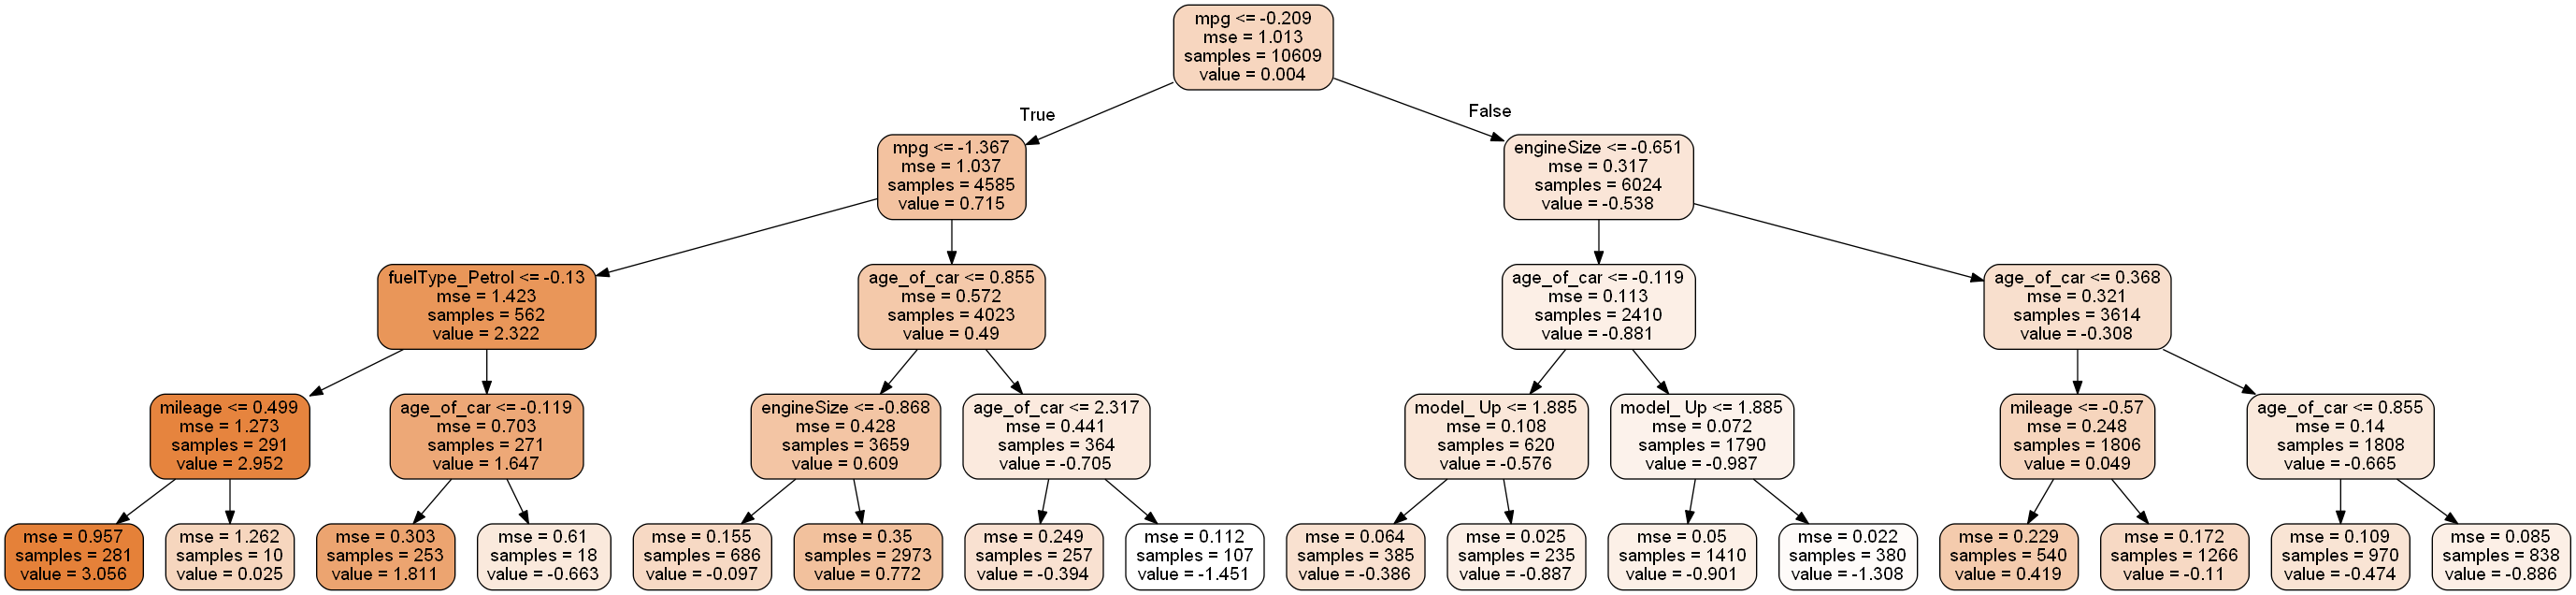

In [61]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [62]:
y_train_pred = dt_best.predict(X_train)
r2_score(y_train, y_train_pred)

0.9597459330811063

In [63]:
y_test_pred = dt_best.predict(X_test)
r2_score(y_test, y_test_pred)

0.9375011846720526

## We have got good score for Decision tree

## Model 3: Ridge Regression

In [64]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [66]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.15506446e-01 -6.67011525e-02 -1.38697446e-01  4.15013986e-01
 -3.35014490e-01  2.36335418e-02  4.99246363e-02 -8.19233912e-03
 -2.64843087e-02  1.24162738e-03 -7.43159556e-03 -1.14195697e-04
 -1.91483117e-02  1.34627596e-01  1.94274160e-01  2.61105258e-03
  7.30870169e-03 -2.69235266e-02 -3.31381674e-02 -2.05102652e-02
 -1.12833887e-02 -1.26154096e-01 -3.06501885e-02  2.79013865e-02
  2.71362314e-02  3.13446212e-02  6.73524709e-02  1.00334900e-01
  5.40181609e-02  1.12592988e-01  3.76566159e-02 -1.34543799e-01
  3.31365768e-02 -6.13988323e-02  4.31366756e-02 -7.87856697e-02
  1.49391852e-01  1.64443205e-02  4.65996480e-02]


In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8916770227812859
0.8818613897112058
1164.1461382684793
520.9357098162195
0.10973193875657265
0.11454171280040007


### HPT on Ridge Regression

In [76]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,  1.0,  5.0, 10.0, 15, 20, 25, 50, 60 , 70, 80, 90, 100, 200, 300, 400, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 5.0,
                                   10.0, 15, 20, 25, 50, 60, 70, 80, 90, 100,
                                   200, 300, 400, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


### Best param still remains 100. Lets try Lasso

## Model 4: Lasso

In [78]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 5.0,
                                   10.0, 15, 20, 25, 50, 60, 70, 80, 90, 100,
                                   200, 300, 400, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [81]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [82]:
lasso.coef_

array([-0.21443209, -0.06758296, -0.13715152,  0.42930141, -0.34016657,
        0.02493277,  0.05478098, -0.00279512, -0.02176743,  0.00125942,
       -0.00547867,  0.        , -0.01555817,  0.13640218,  0.19901102,
        0.00283428,  0.00771269, -0.00374055, -0.02561887, -0.0175843 ,
       -0.        , -0.10173209, -0.02421739,  0.03327808,  0.02923907,
        0.03887893,  0.07720293,  0.11518791,  0.05709549,  0.11551906,
        0.04512274, -0.12007179,  0.        , -0.10665966,  0.        ,
       -0.1302164 ,  0.14038632,  0.00826708,  0.        ])

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8917222053929096
0.8817725467239631
1163.6605611158834
521.3274656063738
0.10968616845281208
0.11462785083693357


### Both Ridge and Lasso giving almost same answer

## Conclusion
- Decision tree provides the highest r^2 score

## Selecting best features for model

Since ther are 40 variables in the dataset after the one hot encoding, I am using SelectKBest option from sklearn to select the best features from the dataset for applying the regression.

For this, I am executing the SelectKBest() on f_regression by taking into consideration from 3 variables to 40 variables to see where we get the best score. 



<AxesSubplot:>

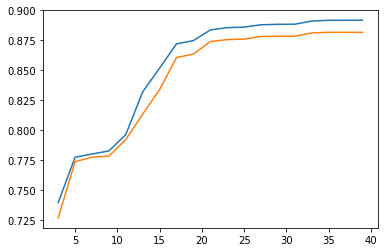

In [137]:
column_names = data_vw_expanded.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 40, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

We get score of 0.88 around 23 variables befor the curve stablizes. Hence keeping k as 23 selecting 23 best variables from the dataset

In [138]:
selector = SelectKBest(f_regression, k = 23)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ California', 'model_ Caravelle', 'model_ Polo',
       'model_ Sharan', 'model_ Shuttle', 'model_ T-Roc', 'model_ Tiguan',
       'model_ Tiguan Allspace', 'model_ Touareg', 'model_ Up',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [139]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [140]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.875646
1,Linear,Ridge(),0.875648
2,Linear,Lasso(),-0.000155
3,Linear,SVR(),0.937802
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.950369
5,Linear,MLPRegressor(),0.943680


The best score we are getting is on a RandomForestRegressor() with a score of 0.9513

# Backward selection for variable selection on linear regression

Fitting a linear regression model and checking the model parameters

In [141]:
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              2420.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:02:17   Log-Likelihood:                         -3327.5
No. Observations:               10609   AIC:                                      6727.
Df Residuals:                   10573   BIC:                                      6989.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [142]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break

Dropping model_ Caddy Maxi and running regression again because pvalue is: 0.9250694205555987
Dropping model_ Caddy and running regression again because pvalue is: 0.8150670541245485
Dropping model_ Eos and running regression again because pvalue is: 0.6605948412754055
Dropping model_ Sharan and running regression again because pvalue is: 0.18832508710004414
Dropping model_ T-Cross and running regression again because pvalue is: 0.4346675071067636
Dropping model_ Amarok and running regression again because pvalue is: 0.32795905775520895
Dropping model_ Touran and running regression again because pvalue is: 0.27902438824566494
Dropping model_ Fox and running regression again because pvalue is: 0.19587065064345235
All p values less than 0.05


8 variables are dropped because p value is higher than our alpha level of 0.05. We fit the model with the remaining variables and see the summary below. 

We can see a slight improvement over the linear regression in our earlier step with SKLearn fit which yielded a r_squared value of 0.87, this vies us a r_square value of 0.89

In [143]:
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              3004.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:02:17   Log-Likelihood:                         -3330.7
No. Observations:               10609   AIC:                                      6719.
Df Residuals:                   10580   BIC:                                      6930.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

## Fitting on polynomial features

I would like to explore the dataset a bit further to see if a polynomial variable model is performing better on the same models. 

I am using PolynomialFeatures() to engineer polynomial features from the dataset. 
We have around 820 features from PolynomialFeatures(), so again using SelectKBest to see how much is our optimum feature set size

(10609, 820)


<AxesSubplot:>

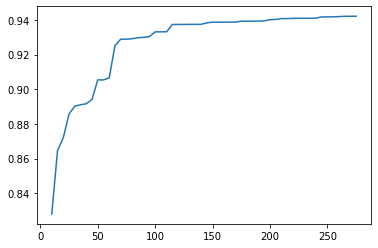

In [144]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

From the above graph we can see that we are hitting 0.93 score around 110 features.

In [145]:
selector = SelectKBest(f_regression, k = 110)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

In [146]:
models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.875646
1,Linear,Ridge(),0.875648
2,Linear,Lasso(),-0.000155
3,Linear,SVR(),0.937802
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.950369
5,Linear,MLPRegressor(),0.943680
6,Polynomial,LinearRegression(),0.929269
7,Polynomial,Ridge(),0.929329
8,Polynomial,Lasso(),0.117342
9,Polynomial,SVR(),0.941405


# Conclusion:
I got maximum r^2 score of 0.955 for polynomian data on RandomForest regressor. 

As next steps, I can concentrate on individual features, and make some transformations such as log transforms on each of the features to make the model perform even better.

Please upvote the notebook if you liked it, and leave me a feedback if you think something could have been better.

# References:
1. https://medium.com/@mayankshah1607/machine-learning-feature-selection-with-backward-elimination-955894654026